<a href="https://colab.research.google.com/github/NahianAlindo/ml_practice/blob/master/dogs_vs_cats_testing_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# since google colab is already installed, will just upload the kaggle.json file
from google.colab import files
files.upload()
# Before importing dataset we wanna do the following
# The kaggle API client expects this file to be in ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# The permission change avoids a warning on kaggle tool startup
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


**Downloading the Data**

In [ ]:
# Downloading the data from kaggle
!kaggle datasets download -d biaiscience/dogs-vs-cats
# checking if downloaded
!ls

 99% 806M/817M [00:05<00:00, 146MB/s]
100% 817M/817M [00:05<00:00, 162MB/s]
dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# Unzip the compressed dogs vs cats folder downloaded
!unzip /content/dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/train/dog.5519.jpg  
  inflating: train/train/dog.552.

In [ ]:
import os, shutil
print('total images in train folder: ', len(os.listdir('/content/train/train')))

total images in train folder:  25000


**Copying Images to Train, Validation and Test Categories**

In [ ]:
# path to directory where original dataset was uncompressed
original_dataset_dir = '/content/train/train'

# Directory where splitted dataset will be stored
base_dir = '/content/cats_and_dogs'
os.mkdir(base_dir)

# directories for the training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# copies the first 8750 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(8750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# copies the next 2500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(8750, 11250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# copies the next 1250 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(11250, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# copies the first 8750 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(8750)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# copies the first 2500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(8750, 11250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# copies the first 1250 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(11250, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# Seeing the content count of the splits
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 8750
total training dog images: 8750
total validation cat images: 2500
total validation dog images: 2500
total test cat images: 1250
total test dog images: 1250


**Importing the dependencies**

In [ ]:
# importing the dependencies
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Building the network**

In [ ]:
# Instantiating a small convnet for dogs vs. cats classification
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# checking dimensions of the feature maps changing with successive layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

**Configuring the model for training**

In [ ]:
# Configuring the model for training
# using RMSProp optimizer because of using sigmoid unit in the end and using binary cross entropy as loss
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

**Data Preprocessing**

Data should be formatted into approximately preprocessed floating-point tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:

1 Read the picture files.

2 Decode the JPEG content to RGB grids of pixels.

3 Convert these into floating-point tensors.

4 Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator, which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.

**Using ImageDataGenerator to read images from directions**

In [ ]:
# rescaling all images by 255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Resizing all images to 150 X 150 and using binary_crossentropy loss coz we need binary labels
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 17500 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# checking the output of one of the generators
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


The above generator it yields batches of 150 × 150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). There are 20 samples in each batch (the batch size). Note that the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, you need to break the iteration loop at some point.


**Fitting the model using a batch generator**

 fit the model to the data using the generator. do so using the fit_generator
method, the equivalent of fit for data generators like this one. When using fit_generator, you can pass a validation_data argument, much as
with the fit method. It’s important to note that this argument is allowed to be a data
generator, but it could also be a tuple of Numpy arrays. If you pass a generator as
validation_data, then this generator is expected to yield batches of validation data
endlessly; thus you should also specify the validation_steps argument, which tells
the process how many batches to draw from the validation generator for evaluation.

In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6809 - acc: 0.5525 - val_loss: 0.6508 - val_acc: 0.6600
Epoch 2/30
100/100 [==============================] - 9s 91ms/step - loss: 0.6409 - acc: 0.6260 - val_loss: 0.6092 - val_acc: 0.6670
Epoch 3/30
100/100 [==============================] - 9s 90ms/step - loss: 0.6150 - acc: 0.6595 - val_loss: 0.6527 - val_acc: 0.6110
Epoch 4/30
100/100 [==============================] - 9s 91ms/step - loss: 0.6058 - acc: 0.6570 - val_loss: 0.5827 - val_acc: 0.7010
Epoch 5/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5732 - acc: 0.6995 - val_loss: 0.5511 - val_acc: 0.7020
Epoch 6/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5698 - acc: 0.7055 - val_loss: 0.5595 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 9s 91ms/step - loss: 0.5487 - acc: 0.7195 - val_loss: 0.5399 - val_acc: 

**Saving the Model**

In [ ]:
model.save('cats_and_dogs_small_1.h5')

**Displaying the curves of loss and accuracy during training**

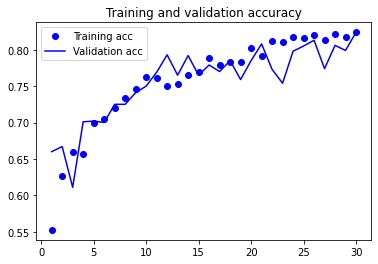

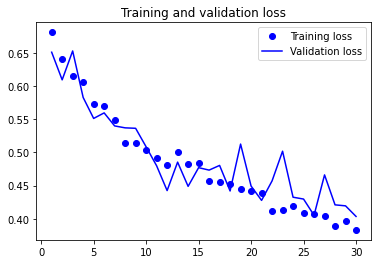

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The above plot shows that we need to regularize the model indicated by the spikes showing the fluctuation of validation set performance. We may want to use dropout regularization.

**Using Data Augmentation**

Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance.

**Setting up a data augmentation config via ImageDataGenerator**

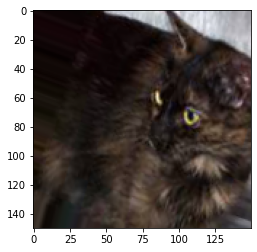

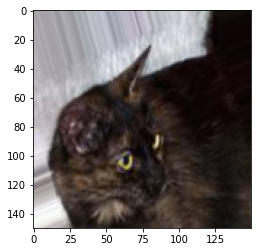

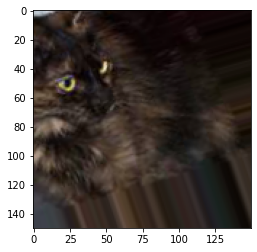

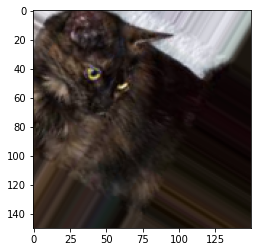

In [ ]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# Displaying randomly generated training images

fnames =  [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3] # chooses an image to augment
img = image.load_img(img_path, target_size=(150, 150)) # Reads the image & resizes it
x = image.img_to_array(img)  # converts img into an np array of shape (150, 150, 3)
x = x.reshape((1, ) + x.shape)  # reshapes it to (1, 150, 150, 3)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 == 0:
        break # you need to break the loop at some pont bcoz the loop is indefinitely looping & generating batches of randomly transformed images infinitely

plt.show()

**Defining convnet that includes dropout**

We will use a dropout layer to the model, right before the densely connected classifier and see how that goes.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

**Training the ConvNet using Data-Augmentation Generation**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=350,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Found 17500 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/50
350/350 [==============================] - 133s 381ms/step - loss: 0.5131 - acc: 0.7449 - val_loss: 0.4662 - val_acc: 0.7848
Epoch 2/50
350/350 [==============================] - 135s 386ms/step - loss: 0.4979 - acc: 0.7573 - val_loss: 0.4223 - val_acc: 0.8132
Epoch 3/50
350/350 [==============================] - 135s 385ms/step - loss: 0.4857 - acc: 0.7626 - val_loss: 0.4185 - val_acc: 0.8124
Epoch 4/50
350/350 [==============================] - 133s 379ms/step - loss: 0.4828 - acc: 0.7681 - val_loss: 0.4068 - val_acc: 0.8140
Epoch 5/50
350/350 [==============================] - 136s 388ms/step - loss: 0.4732 - acc: 0.7718 - val_loss: 0.3877 - val_acc: 0.8336
Epoch 6/50
350/350 [==============================] - 134s 383ms/step - loss: 0.4676 - acc: 0.7795 - val_loss: 0.3761 - val_acc: 0.8416
Epoch 7/50
350/350 [==============================] - 134s 383ms/step - loss: 0.4588 - acc: 0.7821 

In [ ]:
model.save('cats_and_dogs_small_2.h5')

**Plotting accuracy of train and validation set**

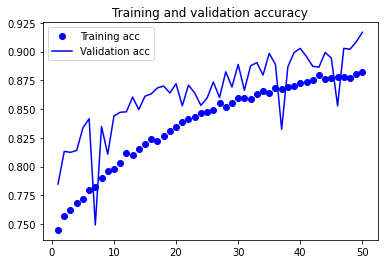

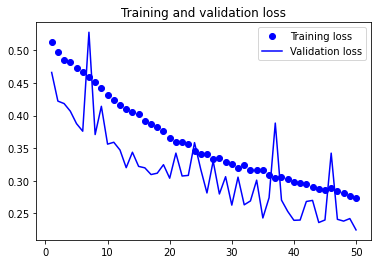

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Results on test set**

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc: ', test_acc)

Found 2500 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc:  0.9169999957084656


**Instantiating a VGG16 convolutional base**

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

The final feature map has shape (4, 4, 512). That’s the feature on top of which you’ll
stick a densely connected classifier.
 At this point, there are two ways you could proceed:
 Running the convolutional base over your dataset, recording its output to a
Numpy array on disk, and then using this data as input to a standalone, densely
connected classifier similar to those you saw in part 1 of this book. This solution
is fast and cheap to run, because it only requires running the convolutional
base once for every input image, and the convolutional base is by far the most
expensive part of the pipeline. But for the same reason, this technique won’t
allow you to use data augmentation.

Extending the model you have (conv_base) by adding Dense layers on top, and
running the whole thing end to end on the input data. This will allow you to use
data augmentation, because every input image goes through the convolutional
base every time it’s seen by the model. But for the same reason, this technique is
far more expensive than the first.

In our case, we have a good GPU on our hands in both Colab and Kaggle. So, we will continue with the latter approach.

Feature Extraction with Data Augmentation: Much more slower and expensive than without data augmentation but allows data augmentation during training: extending the conv_base model and running it end to end on the inputs.

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Before compiling and training the model, , it’s very important to freeze the convolutional base. Freezing a layer or set of layers means preventing their weights from being
updated during training. If you don’t do this, then the representations that were previously learned by the convolutional base will be modified during training. Because
the Dense layers on top are randomly initialized, very large weight updates would be
propagated through the network, effectively destroying the representations previously
learned.
 In Keras, you freeze a network by setting its trainable attribute to False.

In [ ]:
 print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [ ]:
conv_base.trainable=False
print('The number of trainable weights after freezing the conv base: ',len(model.trainable_weights) )

The number of trainable weights after freezing the conv base:  4


With this setup, only the weights from the two Dense layers that you added will be
trained. That’s a total of four weight tensors: two per layer (the main weight matrix
and the bias vector). Note that in order for these changes to take effect, you must first
compile the model. If you ever modify weight trainability after compilation, you
should then recompile the model, or these changes will be ignored.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=50,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=50,class_mode='binary')
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=350,epochs=50,validation_data=validation_generator,validation_steps=50)

Found 17500 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/50
350/350 [==============================] - 147s 419ms/step - loss: 0.4541 - acc: 0.7961 - val_loss: 0.2940 - val_acc: 0.8756
Epoch 2/50
350/350 [==============================] - 139s 398ms/step - loss: 0.3615 - acc: 0.8394 - val_loss: 0.2582 - val_acc: 0.8912
Epoch 3/50
350/350 [==============================] - 138s 393ms/step - loss: 0.3371 - acc: 0.8502 - val_loss: 0.2573 - val_acc: 0.8944
Epoch 4/50
350/350 [==============================] - 136s 390ms/step - loss: 0.3216 - acc: 0.8594 - val_loss: 0.2423 - val_acc: 0.8968
Epoch 5/50
350/350 [==============================] - 136s 389ms/step - loss: 0.3172 - acc: 0.8626 - val_loss: 0.2470 - val_acc: 0.9008
Epoch 6/50
350/350 [==============================] - 136s 388ms/step - loss: 0.3107 - acc: 0.8631 - val_loss: 0.2397 - val_acc: 0.9004
Epoch 7/50
350/350 [==============================] - 136s 389ms/step - loss: 0.3059 - acc: 0.8655 

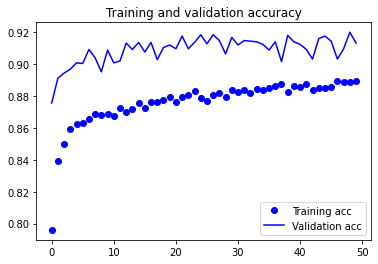

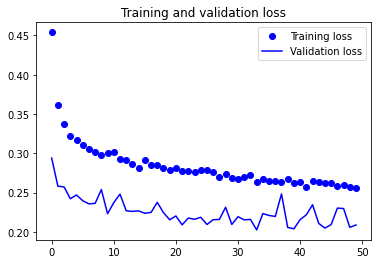

In [ ]:
model.save('cats_and_dogs_small_3.h5')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Fine Tuning**

Another widely used technique for model reuse, complementary to feature
extraction, is fine-tuning (see figure 5.19). Fine-tuning consists of unfreezing a few of
the top layers of a frozen model base used for feature extraction, and jointly training
both the newly added part of the model (in this case, the fully connected classifier)
and these top layers. This is called fine-tuning because it slightly adjusts the more
abstract representations of the model being reused, in order to make them more relevant for the problem at hand.


stated earlier that it’s necessary to freeze the convolution base of VGG16 in order to
be able to train a randomly initialized classifier on top. For the same reason, it’s only
possible to fine-tune the top layers of the convolutional base once the classifier on top
has already been trained. If the classifier isn’t already trained, then the error signal
propagating through the network during training will be too large, and the representations previously learned by the layers being fine-tuned will be destroyed. Thus the
steps for fine-tuning a network are as follow:

1 Add your custom network on top of an already-trained base network.

2 Freeze the base network.

3 Train the part you added.

4 Unfreeze some layers in the base network.

5 Jointly train both these layers and the part you added


In [ ]:
# our model currently looks like the following:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

**Freezing all layers up to a specific one**

In [ ]:
conv_base.trainable= True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable = False

begin fine-tuning the network. You’ll do this with the RMSProp optimizer, using a very low learning rate. The reason for using a low learning rate is that
you want to limit the magnitude of the modifications you make to the representations
of the three layers you’re fine-tuning. Updates that are too large may harm these representations.

**Fine-Tuning the model**

In [ ]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=350,epochs=50,validation_data=validation_generator,validation_steps=50)

Epoch 1/50
350/350 [==============================] - 151s 431ms/step - loss: 0.2517 - acc: 0.8941 - val_loss: 0.1862 - val_acc: 0.9288
Epoch 2/50
350/350 [==============================] - 151s 430ms/step - loss: 0.2200 - acc: 0.9088 - val_loss: 0.2020 - val_acc: 0.9264
Epoch 3/50
350/350 [==============================] - 150s 428ms/step - loss: 0.2003 - acc: 0.9173 - val_loss: 0.1721 - val_acc: 0.9352
Epoch 4/50
350/350 [==============================] - 151s 430ms/step - loss: 0.1860 - acc: 0.9229 - val_loss: 0.1516 - val_acc: 0.9424
Epoch 5/50
350/350 [==============================] - 149s 426ms/step - loss: 0.1691 - acc: 0.9315 - val_loss: 0.1583 - val_acc: 0.9408
Epoch 6/50
350/350 [==============================] - 151s 430ms/step - loss: 0.1594 - acc: 0.9366 - val_loss: 0.1178 - val_acc: 0.9580
Epoch 7/50
350/350 [==============================] - 150s 430ms/step - loss: 0.1533 - acc: 0.9369 - val_loss: 0.1401 - val_acc: 0.9500
Epoch 8/50
350/350 [============================

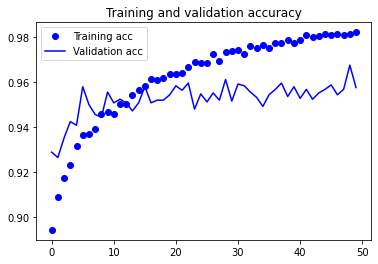

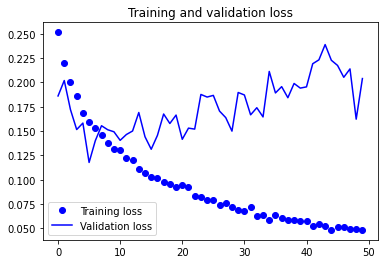

In [ ]:
model.save('cats_and_dogs_small_4.h5')

# Plotting results again
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Smoothing the plots**

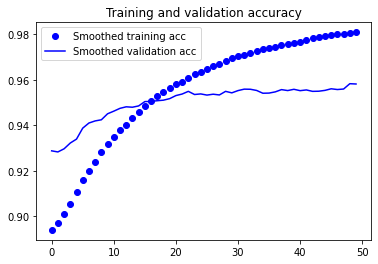

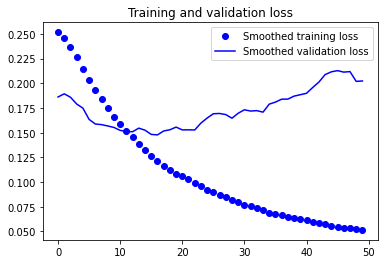

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The validation accuracy curve look much cleaner and we see a slight improvement in the accuracy.

Note that the loss curve doesn’t show any real improvement (in fact, it’s deteriorating). You may wonder, how could accuracy stay stable or improve if the loss isn’t
decreasing? The answer is simple: what you display is an average of pointwise loss values; but what matters for accuracy is the distribution of the loss values, not their average, because accuracy is the result of a binary thresholding of the class probability
predicted by the model. The model may still be improving even if this isn’t reflected
in the average loss.

We can now finally evaluate this model on the test data.

**Result evaluation on test set**

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150),batch_size=50,class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc: ', test_acc)

Found 2500 images belonging to 2 classes.
test acc:  0.9628000259399414


In [ ]:
type(test_generator)

In [ ]:
type(Y_)

numpy.ndarray

In [ ]:
test_all_dir = os.path.join(base_dir, 'test_all')
os.mkdir(test_all_dir)

In [ ]:
fnames = [file for file in os.listdir(test_cats_dir) if file.endswith('.jpg')]

for fname in fnames:
    src = os.path.join(test_cats_dir, fname)
    dst = os.path.join(test_all_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = [file for file in os.listdir(test_dogs_dir) if file.endswith('.jpg')]

for fname in fnames:
    src = os.path.join(test_dogs_dir, fname)
    dst = os.path.join(test_all_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
len(os.listdir(test_all_dir))

2500

In [ ]:
fnames = [file for file in  os.listdir(test_all_dir) if file.endswith('.jpg')]

In [ ]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(8750, 11250)]
X_test = []
Y_test = []
for fname in fnames:
    if 'dog' in fname:
        Y_test.append(1)
    elif 'cat' in fname:
        Y_test.append(0)

In [ ]:
X_test = np.array(fnames)

In [ ]:
X_test

array(['cat.11554.jpg', 'dog.12447.jpg', 'cat.11415.jpg', ...,
       'cat.11754.jpg', 'dog.12353.jpg', 'cat.11795.jpg'], dtype='<U13')

In [ ]:
preds = model.predict_generator(test_generator)

In [ ]:
y = np.array(Y_test)

In [ ]:
y.shape

(2500,)

In [ ]:
type(preds)

numpy.ndarray

In [ ]:
pred = preds.reshape((2500,))

In [ ]:
pred.shape

(2500,)